In [4]:
import matplotlib.pyplot as plotter_lib
import numpy as np
import PIL as image_lib
import tensorflow as tflow

from tensorflow.keras.layers import Flatten
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [50]:
img_height, img_width = 100, 100
train_dir = "./train_mfcc_all/train/"
valid_dir = "./train_mfcc_all/validation/"
num_classes = 7
batch_size = 32

In [51]:
train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   zoom_range=0.4)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1497 images belonging to 7 classes.


In [52]:
train_ds = tflow.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                seed=123,
                                                                label_mode='categorical',
                                                                image_size=(img_height, img_width),
                                                                batch_size=batch_size)

Found 1497 files belonging to 7 classes.


In [54]:
validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(valid_dir,
                                                                seed=123,
                                                                label_mode='categorical',
                                                                image_size=(img_height, img_width),
                                                                batch_size=batch_size)

Found 191 files belonging to 7 classes.


In [55]:
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(valid_dir,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 191 images belonging to 7 classes.


In [56]:
early_stops = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

best_model_file = './Resnet_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [60]:
demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(100,100,3),

                   pooling='avg',classes=7,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)

#demo_resnet_model.add(Conv2D(128, (3, 3), activation='relu'))

#demo_resnet_model.add(MaxPooling2D(3, 3))

demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(256, activation='relu'))

demo_resnet_model.add(Dense(512, activation='relu'))

demo_resnet_model.add(Dense(7, activation='softmax'))

In [61]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)

In [63]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [65]:
demo_resnet_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=50,
                              verbose=1,
                              callbacks = [best_model, reduce_lr])

Epoch 1/50


47/47 [==============================] - ETA: 0s - loss: 1.9472 - accuracy: 0.1443
Epoch 1: val_accuracy did not improve from 0.19372
47/47 [==============================] - 49s 941ms/step - loss: 1.9472 - accuracy: 0.1443 - val_loss: 1.9461 - val_accuracy: 0.1414 - lr: 0.0100
Epoch 2/50
47/47 [==============================] - ETA: 0s - loss: 1.9471 - accuracy: 0.1363
Epoch 2: val_accuracy did not improve from 0.19372
47/47 [==============================] - 42s 894ms/step - loss: 1.9471 - accuracy: 0.1363 - val_loss: 1.9459 - val_accuracy: 0.1466 - lr: 0.0100
Epoch 3/50
47/47 [==============================] - ETA: 0s - loss: 1.9472 - accuracy: 0.1376
Epoch 3: val_accuracy did not improve from 0.19372
47/47 [==============================] - 42s 890ms/step - loss: 1.9472 - accuracy: 0.1376 - val_loss: 1.9461 - val_accuracy: 0.1414 - lr: 0.0100
Epoch 4/50
47/47 [==============================] - ETA: 0s - loss: 1.9466 - accuracy: 0.1336
Epoch 4: val_accuracy did not improve from 0.19

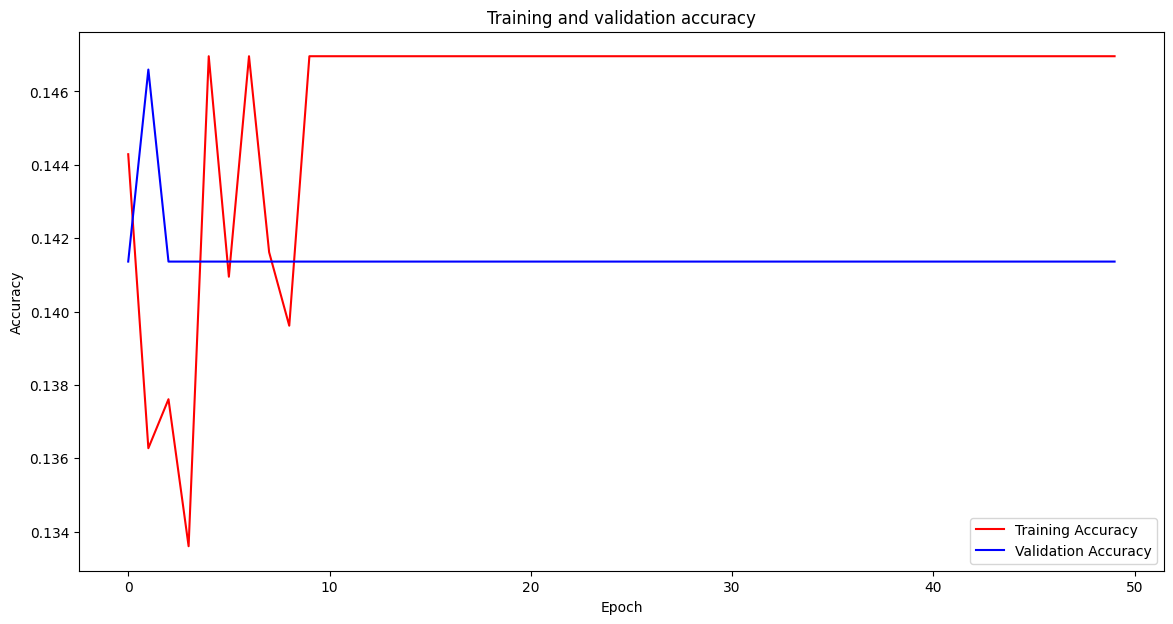

In [67]:
from matplotlib import pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()